In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_por.shape

(649, 43)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.869629,5
1,3.520996,3
2,4.064941,5
3,3.497803,3
4,2.958252,3


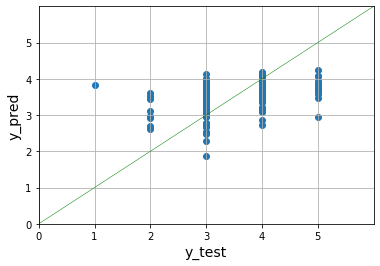

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
mean_absolute_error(y_pred,y_test)

0.5725736177884615

In [11]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [12]:
rmse(y_pred,y_test)

0.7313741736535455

## Decision Tree Regression

In [13]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [14]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [15]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y_pred = grid_search_cv.predict(X_test)

In [17]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.777778,5
1,3.891667,3
2,3.636364,5
3,2.777778,3
4,3.424242,3


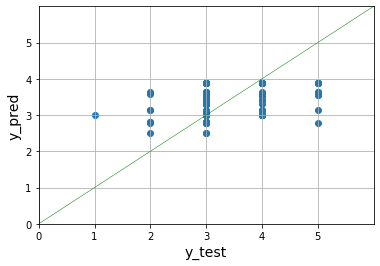

In [18]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [19]:
mean_absolute_error(y_pred,y_test)

0.5814635585587002

In [20]:
rmse(y_pred,y_test)

0.7375400569755137

## Random Forest Regression

In [21]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [22]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = grid_search_cv.predict(X_test)

In [24]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.14,5
1,3.55,3
2,3.98,5
3,3.19,3
4,3.05,3


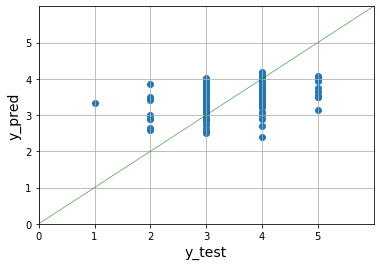

In [25]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [26]:
mean_absolute_error(y_pred,y_test)

0.5723846153846154

In [27]:
rmse(y_pred,y_test)

0.7267615205088309

## XGBoost 

In [28]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [29]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [30]:
y_pred = grid_search_cv.predict(X_test)

In [31]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.349581,5
1,3.378690,3
2,3.641731,5
3,3.478198,3
4,3.117335,3


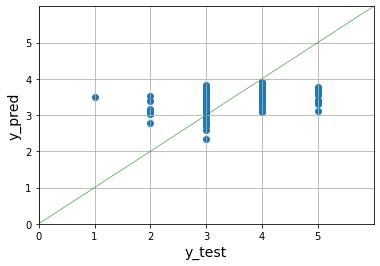

In [32]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [33]:
mean_absolute_error(y_pred,y_test)

0.5882945372508123

In [34]:
rmse(y_pred,y_test)

0.7329645957265557

## Neural Network 

In [35]:
sc = MinMaxScaler()

In [36]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train.shape

(519, 42)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [40]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 130 samples
Epoch 1/300
519/519 [==============================] - 1s 3ms/sample - loss: 11.0625 - val_loss: 9.9355
Epoch 2/300
519/519 [==============================] - 0s 54us/sample - loss: 8.6980 - val_loss: 7.7261
Epoch 3/300
519/519 [==============================] - 0s 54us/sample - loss: 6.2631 - val_loss: 5.0648
Epoch 4/300
519/519 [==============================] - 0s 60us/sample - loss: 3.9909 - val_loss: 2.3866
Epoch 5/300
519/519 [==============================] - 0s 52us/sample - loss: 2.4658 - val_loss: 0.9863
Epoch 6/300
519/519 [==============================] - 0s 87us/sample - loss: 2.7236 - val_loss: 0.9032
Epoch 7/300
519/519 [==============================] - 0s 58us/sample - loss: 2.7340 - val_loss: 1.1396
Epoch 8/300
519/519 [==============================] - 0s 62us/sample - loss: 2.0261 - val_loss: 1.7360
Epoch 9/300
519/519 [==============================] - 0s 56us/sample - loss: 2.1553 - val_loss: 2.1147
Epoch 10/300
519/5

519/519 [==============================] - 0s 56us/sample - loss: 0.9983 - val_loss: 1.4030
Epoch 79/300
519/519 [==============================] - 0s 56us/sample - loss: 0.9548 - val_loss: 1.2443
Epoch 80/300
519/519 [==============================] - 0s 54us/sample - loss: 0.8589 - val_loss: 1.2284
Epoch 81/300
519/519 [==============================] - 0s 52us/sample - loss: 0.9212 - val_loss: 1.1156
Epoch 82/300
519/519 [==============================] - 0s 54us/sample - loss: 0.8938 - val_loss: 0.9779
Epoch 83/300
519/519 [==============================] - 0s 56us/sample - loss: 0.8873 - val_loss: 1.0114
Epoch 84/300
519/519 [==============================] - 0s 52us/sample - loss: 0.8872 - val_loss: 1.2213
Epoch 85/300
519/519 [==============================] - 0s 54us/sample - loss: 0.8082 - val_loss: 1.2514
Epoch 86/300
519/519 [==============================] - 0s 56us/sample - loss: 0.9180 - val_loss: 1.0578
Epoch 87/300
519/519 [==============================] - 0s 58us/samp

519/519 [==============================] - 0s 60us/sample - loss: 0.7963 - val_loss: 0.8139
Epoch 156/300
519/519 [==============================] - 0s 30us/sample - loss: 0.7318 - val_loss: 0.6592
Epoch 157/300
519/519 [==============================] - 0s 60us/sample - loss: 0.7350 - val_loss: 0.6533
Epoch 158/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6982 - val_loss: 0.7996
Epoch 159/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6632 - val_loss: 0.8706
Epoch 160/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6921 - val_loss: 0.7987
Epoch 161/300
519/519 [==============================] - 0s 60us/sample - loss: 0.7047 - val_loss: 0.6867
Epoch 162/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6681 - val_loss: 0.7069
Epoch 163/300
519/519 [==============================] - 0s 30us/sample - loss: 0.7340 - val_loss: 0.8033
Epoch 164/300
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 60us/sample - loss: 0.5712 - val_loss: 0.7066
Epoch 233/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5802 - val_loss: 0.7472
Epoch 234/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5912 - val_loss: 0.7144
Epoch 235/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6228 - val_loss: 0.6507
Epoch 236/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6199 - val_loss: 0.6403
Epoch 237/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6326 - val_loss: 0.6822
Epoch 238/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5800 - val_loss: 0.6987
Epoch 239/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5932 - val_loss: 0.7137
Epoch 240/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5779 - val_loss: 0.6738
Epoch 241/300
519/519 [==============================] - 0s 

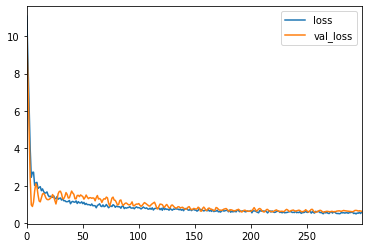

In [41]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.025853,5
1,3.105001,3
2,2.927570,5
3,2.926866,3
4,2.854011,3


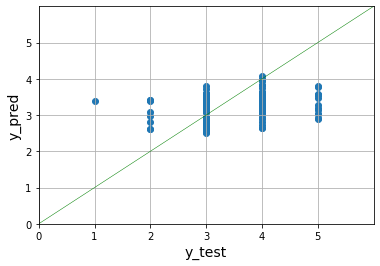

In [44]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [45]:
mean_absolute_error(y_pred,y_test)

0.6167313539064847

In [46]:
rmse(y_pred,y_test)

0.8047135844546573

## Stacking 

In [47]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [48]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [49]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [50]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [51]:
model = Sequential()

model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 259 samples
Epoch 1/300
519/519 [==============================] - 1s 1ms/sample - loss: 7.5898 - val_loss: 5.4802
Epoch 2/300
519/519 [==============================] - 0s 60us/sample - loss: 4.5890 - val_loss: 2.4554
Epoch 3/300
519/519 [==============================] - 0s 60us/sample - loss: 2.4273 - val_loss: 0.9442
Epoch 4/300
519/519 [==============================] - 0s 31us/sample - loss: 2.7553 - val_loss: 0.9254
Epoch 5/300
519/519 [==============================] - 0s 59us/sample - loss: 2.8774 - val_loss: 0.9557
Epoch 6/300
519/519 [==============================] - 0s 72us/sample - loss: 1.9231 - val_loss: 1.5645
Epoch 7/300
519/519 [==============================] - 0s 34us/sample - loss: 1.9414 - val_loss: 1.9311
Epoch 8/300
519/519 [==============================] - 0s 30us/sample - loss: 2.1004 - val_loss: 1.7089
Epoch 9/300
519/519 [==============================] - 0s 60us/sample - loss: 2.0135 - val_loss: 1.2812
Epoch 10/300
519/51

519/519 [==============================] - 0s 60us/sample - loss: 0.8805 - val_loss: 0.8268
Epoch 79/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8773 - val_loss: 0.8797
Epoch 80/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8336 - val_loss: 0.8865
Epoch 81/300
519/519 [==============================] - 0s 60us/sample - loss: 0.9472 - val_loss: 0.8506
Epoch 82/300
519/519 [==============================] - 0s 30us/sample - loss: 0.8430 - val_loss: 0.7698
Epoch 83/300
519/519 [==============================] - 0s 30us/sample - loss: 0.9183 - val_loss: 0.8652
Epoch 84/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8776 - val_loss: 0.9557
Epoch 85/300
519/519 [==============================] - 0s 60us/sample - loss: 0.7753 - val_loss: 1.0099
Epoch 86/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8887 - val_loss: 1.1233
Epoch 87/300
519/519 [==============================] - 0s 30us/samp

519/519 [==============================] - 0s 60us/sample - loss: 0.6909 - val_loss: 0.5306
Epoch 156/300
519/519 [==============================] - 0s 30us/sample - loss: 0.7059 - val_loss: 0.5273
Epoch 157/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6763 - val_loss: 0.6098
Epoch 158/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6847 - val_loss: 0.6267
Epoch 159/300
519/519 [==============================] - 0s 63us/sample - loss: 0.6809 - val_loss: 0.5781
Epoch 160/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6519 - val_loss: 0.5153
Epoch 161/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6846 - val_loss: 0.5643
Epoch 162/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6719 - val_loss: 0.6664
Epoch 163/300
519/519 [==============================] - 0s 30us/sample - loss: 0.6640 - val_loss: 0.6061
Epoch 164/300
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 30us/sample - loss: 0.5961 - val_loss: 0.4320
Epoch 233/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5400 - val_loss: 0.4212
Epoch 234/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5173 - val_loss: 0.3937
Epoch 235/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5985 - val_loss: 0.3760
Epoch 236/300
519/519 [==============================] - 0s 30us/sample - loss: 0.5559 - val_loss: 0.3637
Epoch 237/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5606 - val_loss: 0.3941
Epoch 238/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6005 - val_loss: 0.4217
Epoch 239/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5459 - val_loss: 0.4106
Epoch 240/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5327 - val_loss: 0.3910
Epoch 241/300
519/519 [==============================] - 0s 

In [52]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [53]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,3.500000,3.25,3.271738,2.561960
1,3.666667,3.27,3.547333,3.021120
2,2.550000,3.01,3.213807,2.676789
3,3.346154,3.75,3.691310,3.210627
4,3.692308,3.78,3.546992,3.682799


In [54]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,2.55,3.27,3.436130,3.832156
1,2.95,3.30,3.233678,3.201353
2,3.50,3.58,3.476125,3.714223
3,3.50,3.89,3.592883,2.817334
4,2.95,3.06,2.984043,2.739618


### Meta Model 

In [55]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [56]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,4.569433,5
1,3.563216,3
2,4.452241,5
3,2.827734,3
4,2.839868,3


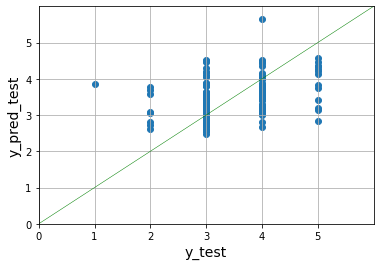

In [57]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [58]:
mean_absolute_error(y_pred_test,y_test)

0.6013271387491748

In [59]:
rmse(y_pred_test,y_test)

0.7885734157050749